In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

#**Basics steps for supervised learning:**
  1. Load dataset
  2. Split data (train & test)
  3. Train the model (using training data)
  4. Test the model (using test data)


In [15]:

# iris = load_iris()

# X = iris.data[:, :2]
# y = iris.target

# # Step 1: Load data (use only 2 features)
iris = load_iris()

X = iris.data[:, :2] # sepal length & sepal width
y = iris.target

feature_names = iris.feature_names[:2]
class_names = iris.target_names

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Train
model.fit(X_train, y_train)

# Step 4: Test
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0])

In [16]:
model = DecisionTreeClassifier(max_depth=3, random_state=0)
model.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=0)

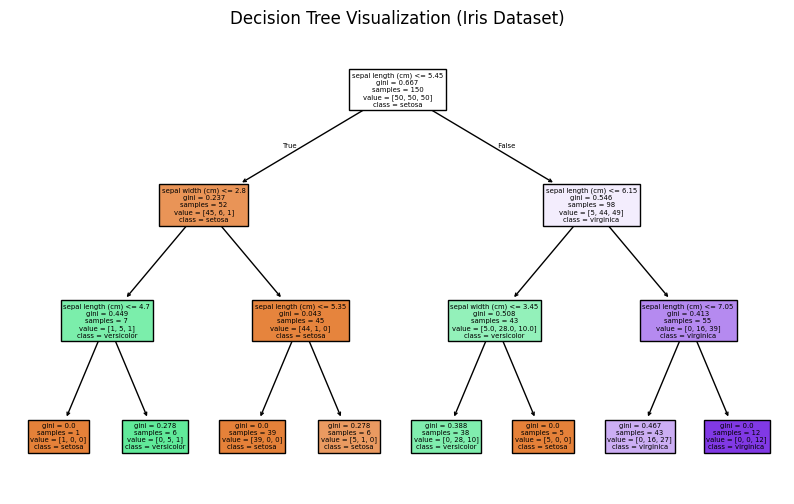

In [17]:
# Plot Decision Tree
plt.figure(figsize=(10,6))
plot_tree(
    model,
    feature_names=iris.feature_names[:2],
    class_names=iris.target_names,
    filled=True
)
plt.title("Decision Tree Visualization (Iris Dataset)")
plt.show()

#**Visualize Feature Distributions (Histogram / Density Plot)**

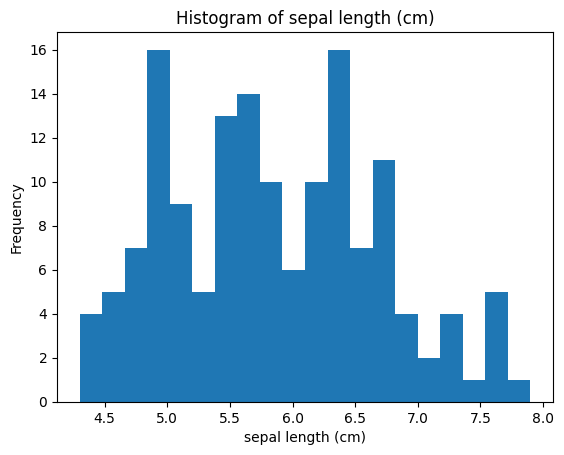

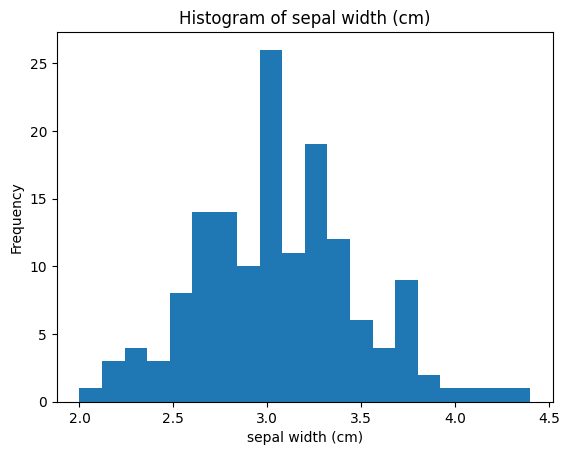

In [18]:
for i, feature in enumerate(feature_names):
    plt.hist(X[:, i], bins=20)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


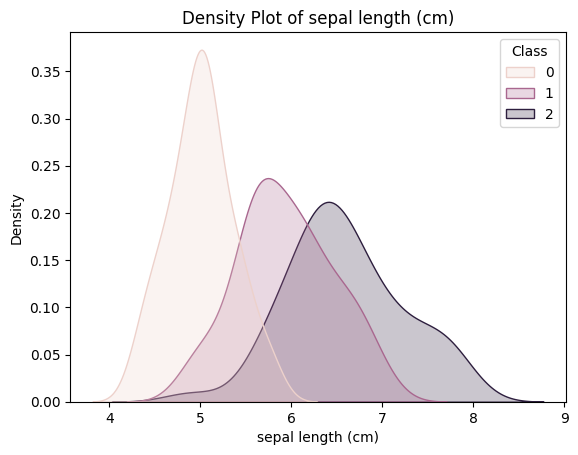

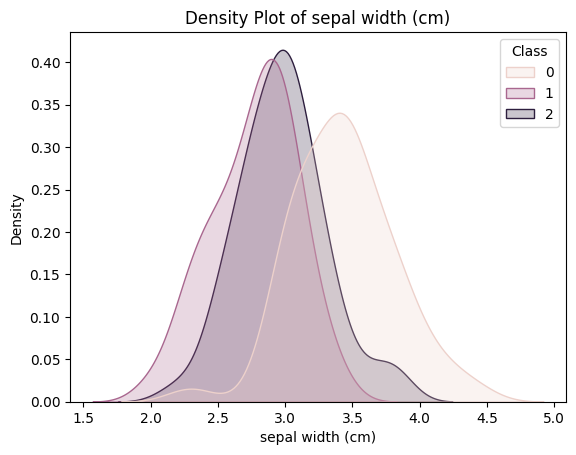

In [19]:
# Density Plot

df = pd.DataFrame(X, columns=feature_names)
df["Class"] = y

for feature in feature_names:
    sns.kdeplot(data=df, x=feature, hue="Class", fill=True)
    plt.title(f"Density Plot of {feature}")
    plt.show()


#**Visualize Class Distribution (Bar Chart / Pie Chart)**

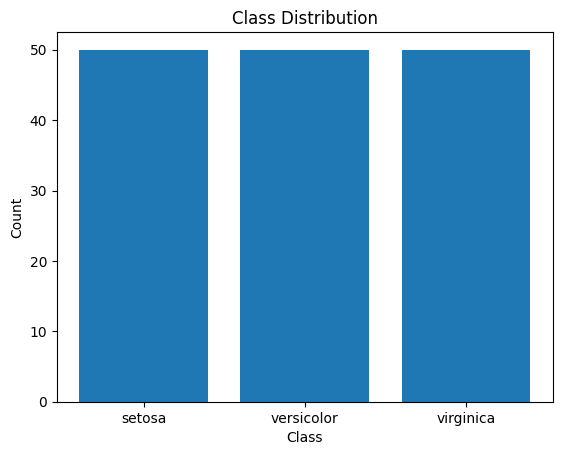

In [20]:
#Bar Chart
class_counts = pd.Series(y).value_counts()

plt.bar(class_names, class_counts)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


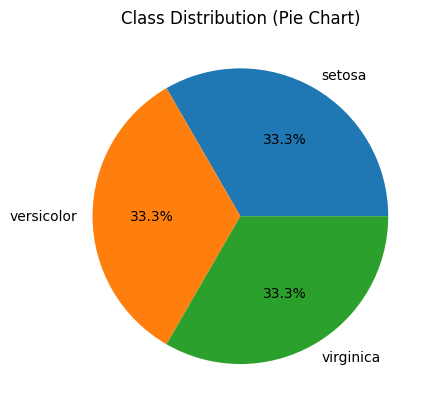

In [21]:
#Pie chart
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%')
plt.title("Class Distribution (Pie Chart)")
plt.show()


#**Visualize Decision Boundaries (2D Classification)**

In [22]:
# Create mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

In [23]:
#Predict class for each grid point
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

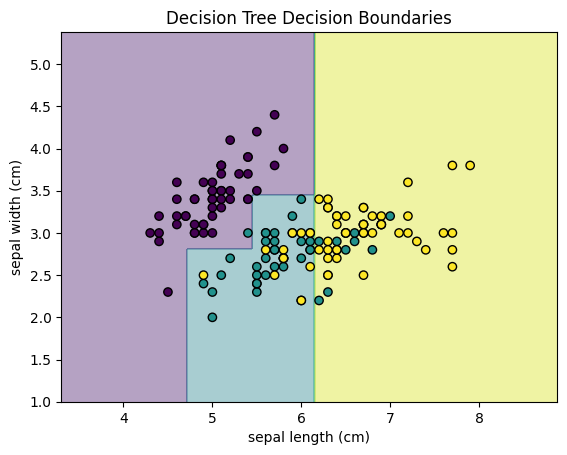

In [24]:
#Plot decision boundary with data points
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Decision Tree Decision Boundaries")
plt.show()
